<a href="https://colab.research.google.com/github/yamilethpuente/unidad-3/blob/main/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este capítulo exploramos técnicas avanzadas de visualización con Matplotlib, aprovechando su API orientada a objetos para crear
gráficos expresivos dentro de proyectos realizados con Python.
Trabajaremos con gráficos de torta, áreas, densidades y diagramas de error, reforzando buenas prácticas para destacar información sin
sacrificar claridad.
6.1 Gráficos de torta ( pie )
Los gráficos de torta muestran proporciones de un total. Funcionan mejor con pocas categorías y diferencias bien marcadas.
Puntos clave
Utilizá Axes.pie para crear el gráfico desde un objeto Axes .
Mantené la relación de aspecto en 1:1 con ax.set_aspect('equal') para obtener un círculo.
autopct muestra porcentajes formateados.
explode resalta sectores relevantes.
labels o ax.legend() facilitan la lectura.

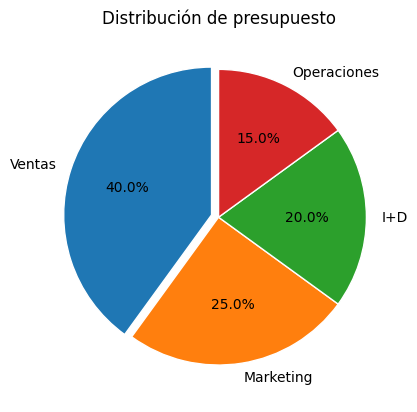

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
valores = [40, 25, 20, 15]
labels = ["Ventas", "Marketing", "I+D", "Operaciones"]
explode = [0.05, 0, 0, 0] # Resaltar "Ventas"
ax.pie(
valores,
labels=labels,
explode=explode,
autopct="%.1f%%",
startangle=90,
wedgeprops={"linewidth": 1, "edgecolor": "white"}
)
ax.set_title("Distribución de presupuesto")
ax.set_aspect('equal') # Círculo perfecto
plt.show()

6.2 Gráficos de área ( fill_between )
Estos gráficos destacan el área bajo una curva o entre dos curvas, útiles para bandas de confianza, rangos o acumulados.
Área bajo una curva

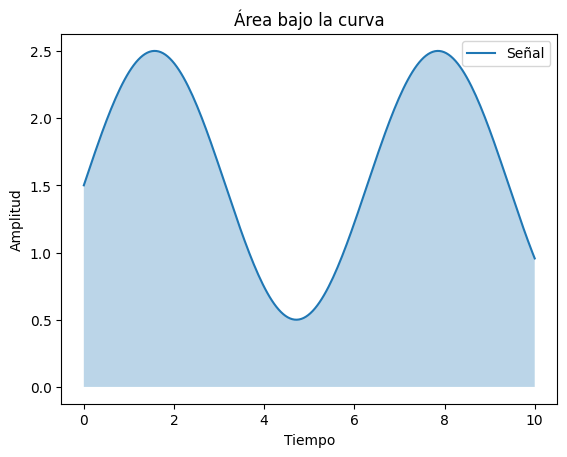

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 200)
y = np.sin(x) + 1.5
fig, ax = plt.subplots()
ax.plot(x, y, label="Señal")
ax.fill_between(x, y, 0, alpha=0.3) # Relleno hasta el eje X
ax.set_title("Área bajo la curva")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Amplitud")
ax.legend()
plt.show()

Área entre dos curvas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2 * np.pi, 300)
y1 = np.sin(x) + 1
y2 = np.cos(x) + 1
fig, ax = plt.subplots()
ax.plot(x, y1, label="Seno")
ax.plot(x, y2, label="Coseno")
ax.fill_between(x, y1, y2, where=(y1 >= y2), alpha=0.25, label="Área (y1 >= y2)")
ax.fill_between(x, y1, y2, where=(y1 < y2), alpha=0.25, label="Área (y1 < y2)")
ax.set_title("Área entre dos curvas")
ax.set_xlabel("Ángulo")
ax.set_ylabel("Valor")
ax.legend()
plt.show()

6.3 Gráficos de densidad con histograma ( density=True )
Para analizar distribuciones continuas, normalizá el histograma con density=True y comparalo con una curva teórica generada con
NumPy.

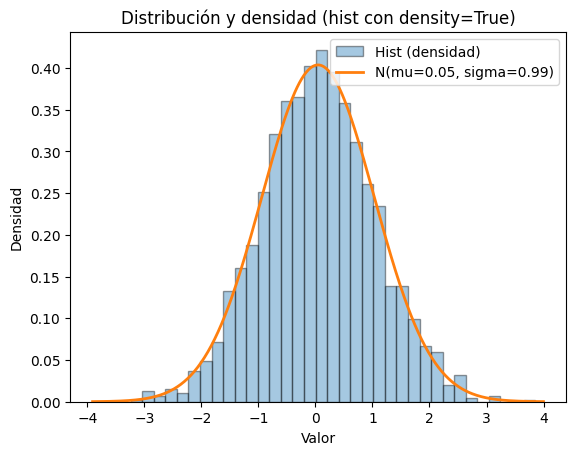

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
muestras = np.random.normal(loc=0, scale=1, size=2000)
fig, ax = plt.subplots()
# Histograma como densidad
ax.hist(
muestras,
bins="auto",
density=True,
edgecolor="black",
alpha=0.4,
label="Hist (densidad)"
)
# Curva normal estimada con media y desvío de los datos
mu, sigma = np.mean(muestras), np.std(muestras, ddof=1)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 400)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
ax.plot(x, pdf, linewidth=2, label=f"N(mu={mu:.2f}, sigma={sigma:.2f})")
ax.set_title("Distribución y densidad (hist con density=True)")
ax.set_xlabel("Valor")
ax.set_ylabel("Densidad")
ax.legend()
plt.show()

6.4 Diagramas de error ( errorbar )
Las barras de error muestran incertidumbre en mediciones. Podés combinar errores verticales ( yerr ) y horizontales ( xerr ) y ajustar
tapas ( capsize ).
Error vertical

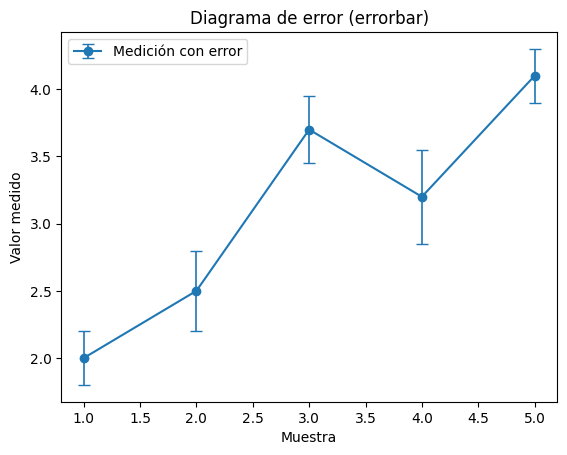

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1, 6)
y = np.array([2.0, 2.5, 3.7, 3.2, 4.1])
yerr = np.array([0.2, 0.3, 0.25, 0.35, 0.2]) # Error vertical
fig, ax = plt.subplots()
ax.errorbar(
x,
y,
yerr=yerr,
fmt="o-", # Marcador + línea
capsize=4, # Tapa de las barras de error
elinewidth=1.2, # Grosor de la barra de error
label="Medición con error"
)
ax.set_title("Diagrama de error (errorbar)")
ax.set_xlabel("Muestra")
ax.set_ylabel("Valor medido")
ax.legend()
plt.show()


Error en X e Y

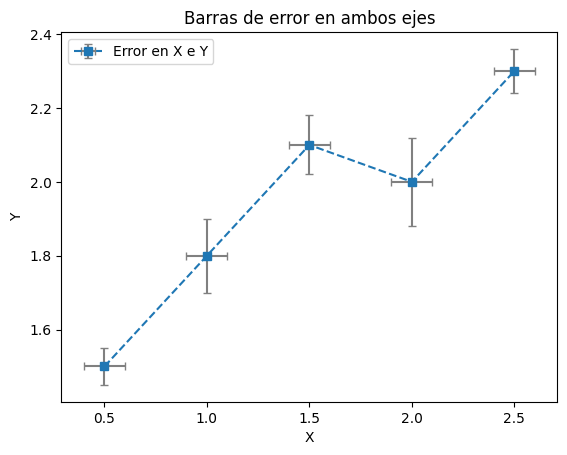

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.5, 2.5, 5)
y = np.array([1.5, 1.8, 2.1, 2.0, 2.3])
xerr = 0.1
yerr = [0.05, 0.1, 0.08, 0.12, 0.06]
fig, ax = plt.subplots()
ax.errorbar(
x,
y,
xerr=xerr,
yerr=yerr,
fmt="s--",
capsize=3,
ecolor="gray",
label="Error en X e Y"
)
ax.set_title("Barras de error en ambos ejes")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.show()

Glosario: DE cuantifica la dispersión de las mediciones, EE estima la incertidumbre de la media y IC95 indica el rango probable del valor
real con un 95% de confianza.
Checklist rápido
Priorizá la API orientada a objetos ( fig, ax = plt.subplots() ).
Mantené títulos, etiquetas y leyendas consistentes.
Aplicá alpha para manejar solapamientos visuales.
En gráficos de torta limitá categorías y garantizá ax.set_aspect('equal') .
En diagramas de error explicá qué representa la incertidumbre (DE, EE, IC95, etc.).